In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai2](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastai2.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
horizon, lookback = 7, 25    

Getting the data fastai style:

In [ ]:
# hide
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300,step=3)

Train:71691; Valid: 1200; Test 300


In [ ]:
items = dummy_data_generator(60, 10, nrows=300)
data = TSDataLoaders.from_items(items,horizon = horizon, lookback = lookback, step=5,valid_pct=.2)

Train:1500; Valid: 300; Test 300


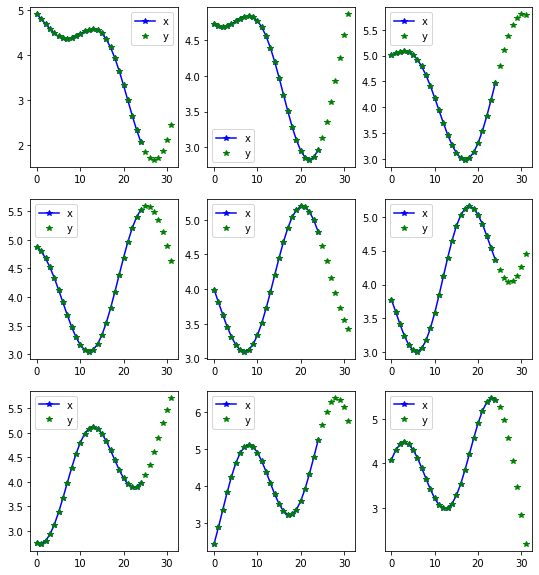

In [ ]:
data.show_batch()

In [ ]:
learn =nbeats_learner(data)   

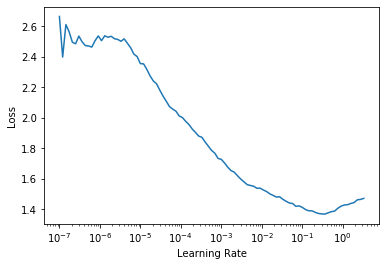

In [ ]:
from fastai2.callback.all import *
learn.lr_find()       

epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.624049,1.284563,0.759560,0.975853,0.450282,2.760517,00:02
1,1.482979,0.982669,0.634794,0.857715,0.311236,2.659375,00:02
2,1.384616,0.887147,0.600295,0.825266,0.281954,2.543423,00:02
3,1.310885,0.881163,0.594149,0.817573,0.258415,2.819199,00:02
4,1.267211,0.816917,0.552809,0.787713,0.203317,2.955429,00:02
5,1.229977,0.811555,0.540651,0.742238,0.212535,3.129152,00:02
6,1.203240,0.786385,0.558036,0.778185,0.243013,3.053049,00:02
7,1.173879,0.797882,0.546092,0.749452,0.216076,2.890859,00:02
8,1.149664,0.825174,0.580364,0.826054,0.234946,2.932342,00:02
9,1.140661,0.791325,0.547702,0.765976,0.222041,3.032246,00:02


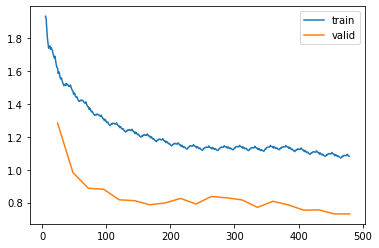

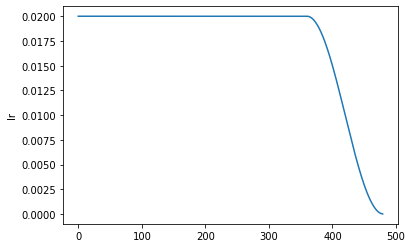

In [ ]:
learn.fit_flat_cos(20, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

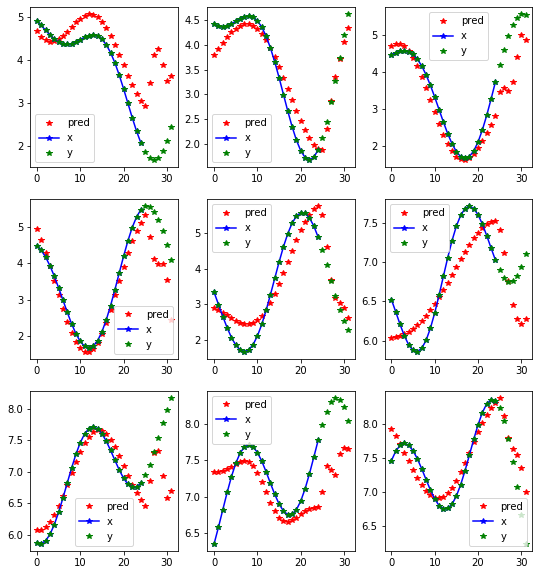

In [ ]:
learn.show_results(0)

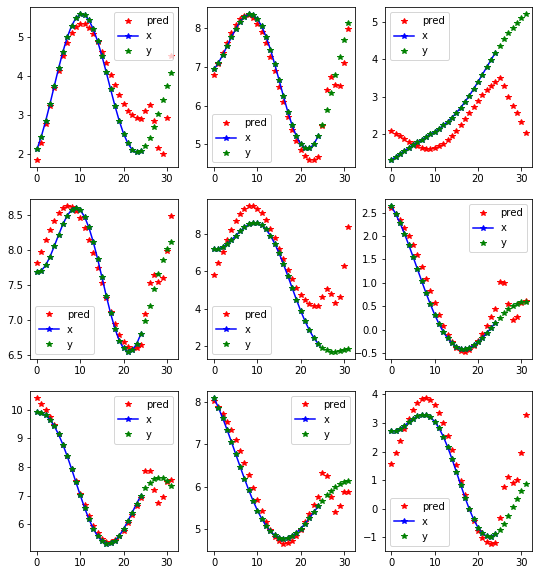

In [ ]:
learn.show_results(1)

## Interperation

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,-0.074099414,-0.07426101,0.4293354,0.15625,-1.5939595,0.35737035
theta_0_std,0.18427914,0.18240511,1.1435487,0.54097944,0.81059384,1.2032012
theta_1_mean,-0.006618,-0.0060307784,-0.733439,-0.92187035,0.69952923,-0.35547772
theta_1_std,0.018844062,0.009154702,0.4438819,0.27048832,0.45268404,0.6103023
theta_2_mean,-0.0016885607,0.00012500375,-0.53056526,0.15625,0.25669834,-1.6763806e-07
theta_2_std,0.00072945596,0.0004879491,1.193347,0.54097944,0.41068566,4.3785803e-07
att_mean,0.947958,0.41586,0.490716,0.289062,0.64974,0.584103
att_std,0.221936,0.490302,0.49319,0.453327,0.474961,0.466623
theta_3_mean,NaN,-6.5637076e-05,NaN,-0.078125,1.5937493,-0.07927033
theta_3_std,NaN,9.4638235e-05,NaN,0.27048972,0.81101006,0.92355716


In [ ]:
# hide
from fastai2.interpret import *
from fastseq.nbeats.interpret import *

In [ ]:
# hide
interp = NBeatsInterpretation.from_learner(learn)

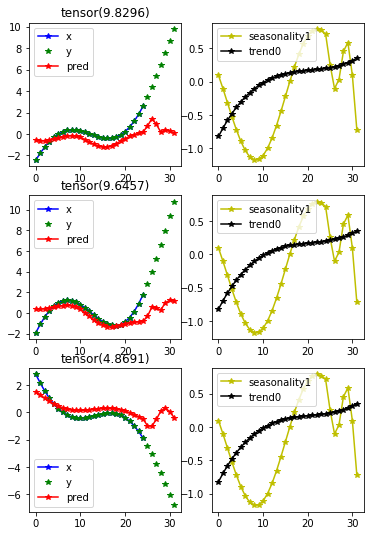

In [ ]:
# hide
interp.plot_top_losses(3, combine_stack=True)